In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
df=pd.read_csv('./car data.csv')
print(df.shape)
df.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Convert Categorical Data into Numeric

In [13]:
unique_dict=lambda column:{i:idx for idx,i in enumerate(sorted(column.unique()))}

def convert_category_to_numeric(df,culomn_list):
    for col in column_list:
        dict_=unique_dict(df[col])
        df[col]=df[col].apply(lambda x:dict_[x])
        
    return df

column_list=["Car_Name","Fuel_Type","Seller_Type","Transmission"]  
df=convert_category_to_numeric(df,column_list)   
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


## Take Selling_Price as Target to predict and reamining as Features

In [14]:
label_column=["Selling_Price"]
feature_columns=[col for col in df.columns if col not in label_column]
feature_df=df[feature_columns]
label_df=df[label_column]
feature_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0


## Normalize The Features

In [15]:
def normalize(df):
    df=df.astype(float)
    for col in df.columns:
        min_=df[col].min()
        max_=df[col].max()
        df[col]=df[col].apply(lambda x:(x-min_)/(max_-min_))
    return df

feature_df=normalize(feature_df)
feature_df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0.927835,0.733333,0.057109,0.053053,1.0,0.0,1.0,0.0
1,0.958763,0.666667,0.099913,0.085085,0.5,0.0,1.0,0.0
2,0.701031,0.933333,0.103273,0.012813,1.0,0.0,1.0,0.0
3,0.989691,0.533333,0.041504,0.009409,1.0,0.0,1.0,0.0
4,0.948454,0.733333,0.070980,0.083984,0.5,0.0,1.0,0.0


## Split Train and Test Data

In [16]:
def split(feature_df,label_df,compact_reg=False):
    if compact_reg:
        feature_df["Bias"]=np.ones(feature_df.shape[0])
        
    features=feature_df.values
    label=label_df.values
    X_train,Y_train=features[:int(.7*features.shape[0])],label[:int(.7*features.shape[0])]
    X_test,Y_test=features[int(.7*features.shape[0]):],label[int(.7*features.shape[0]):]
    
    return X_train,Y_train,X_test,Y_test


In [17]:
def plot(Y_test,Y_pred):
    plt.scatter(range(len(Y_test)),Y_test,  color='red',label="Actual data(Y actual)")
    plt.scatter(range(len(Y_pred)),Y_pred, color='green', linewidth=3,label='predicted data(Y predicted)')
    plt.legend()
    plt.xlabel("Data Index")
    plt.ylabel('Output')
    plt.title("Linear Regration output")
    plt.show()

# Algoritm1: Linear Regression from scratch using compact formula

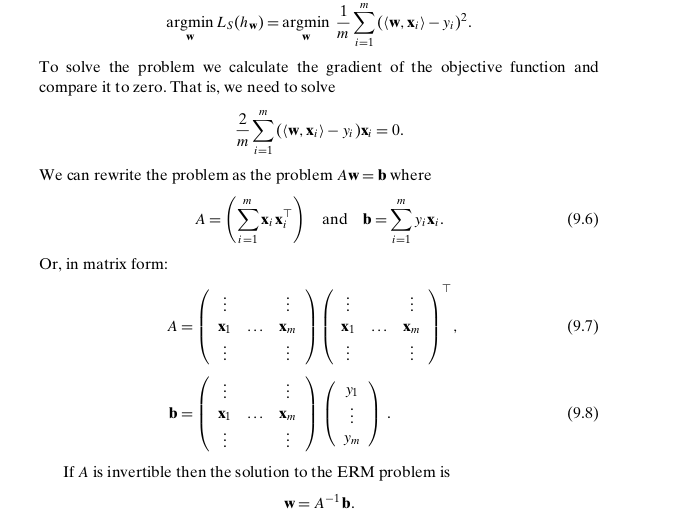

r2_score: 0.78
Scatter plot of test and predicted data


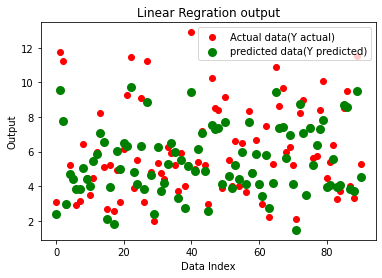

In [18]:
def linear_reg_compact(X_train,Y_train):
    X=X_train.T
    A=np.dot(X,X.T)
    B=np.dot(X,Y_train)

    if np.linalg.det(A)==0:
        A_inverse= np.linalg.pinv(A)
    else:
        A_inverse= np.linalg.inv(A)

    W=np.dot(A_inverse,B)
    
    return W

X_train,Y_train,X_test,Y_test=split(feature_df,label_df,True)
W=linear_reg_compact(X_train,Y_train)

Y_pred_comp=np.dot(X_test,W).round(3).reshape(-1)

print("r2_score:",r2_score(Y_test,Y_pred_comp).round(2))
print('Scatter plot of test and predicted data')
plot(Y_test,Y_pred_comp)

# Algorithm2: Linear Regression using sklearn inbuld function

r2_score: 0.78
Scatter plot of test and predicted data for inbuld regression


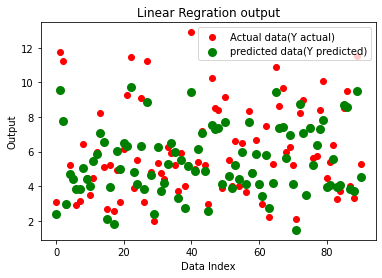

In [19]:
X_train,Y_train,X_test,Y_test=split(feature_df,label_df)
reg = LinearRegression().fit(X_train, Y_train)
Y_pred_in=reg.predict(X_test).round(3)

print("r2_score:",r2_score(Y_test,Y_pred_in).round(2))
print('Scatter plot of test and predicted data for inbuld regression')
plot(Y_test,Y_pred_in)

# Algorithm3: Linear Regression from scratch using SGD

r2_score: 0.75


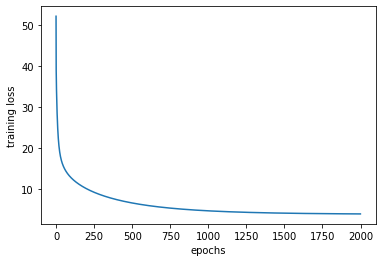

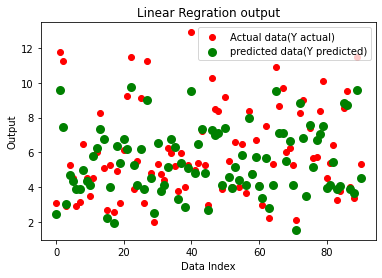

In [20]:
def linear_regression_SGD(X_train,Y_train,epochs,lr):
    
    weight = np.random.normal(0,1,(X_train.shape[1]))
    bias= 0#np.random.normal(0,1)
    m=X_train.shape[0]
    loss_list=[]
    for epoch in range(epochs):
        
        #forward propogation
        y=np.dot(X_train,weight)+bias
        loss=((y-Y_train)**2).sum()/m
        loss_list.append(loss)

        #Back propoation
        d_loss=2*(y-Y_train)/m
        d_weight=np.dot(X_train.T,d_loss)
        d_bias=d_loss.sum()
        
        #weight_update
        weight=weight-lr*d_weight
        bais=bias-lr*d_bias
    
    return weight,bias,loss_list

epochs=2000
lr=.1
weight,bias,loss_list=linear_regression_SGD(X_train,Y_train.reshape(-1),epochs,lr)

Y_pred_sgd=np.dot(X_test,weight)+bias
print("r2_score:",r2_score(Y_test,Y_pred_sgd).round(2))

plt.plot(range(epochs),loss_list)
plt.xlabel("epochs")
plt.ylabel("training loss")
plt.show()

plot(Y_test,Y_pred_sgd)

# Testing avobe three algorithms on 2 dimenstional data 

In [21]:
def generate_data(beta, n, std_dev):
    x = np.arange(0,n,4)
    e = np.random.randn(n//4) * std_dev
    y = x * beta + e
    x=(x-x.min())/(x.max()-x.min())
    return x.reshape(-1,1),y

x, y = generate_data(10, 100, 50)
print(len(x),len(y))

25 25


## Using Algoritm1

r2_score: 0.98


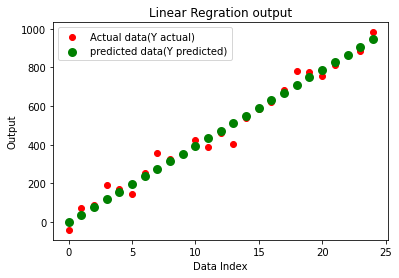

In [22]:
W=linear_reg_compact(x,y)
y_comp=np.dot(x,W).round(3).reshape(-1)
print("r2_score:",r2_score(y,y_comp).round(2))
plot(y,y_comp)

## Using Algoritm2

r2_score: 0.98


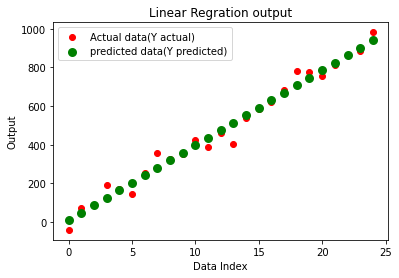

In [23]:
reg = LinearRegression().fit(x, y)
y_in=reg.predict(x).round(3)
print("r2_score:",r2_score(y,y_in).round(2))
plot(y,y_in)

## Using Algoritm3

r2_score: 0.97


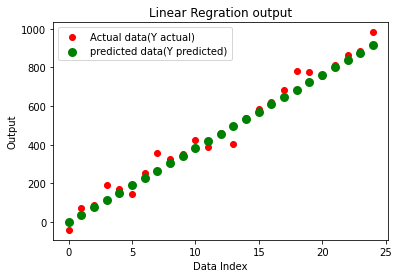

In [24]:
epochs=500
lr=.01
weight,bias,loss_list=linear_regression_SGD(x,y,epochs,lr)
y_sgd=np.dot(x,weight)+bias
print("r2_score:",r2_score(y,y_sgd).round(2))
plot(y,y_sgd)